In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("cap5.csv")

In [4]:
df["datetime"] = pd.to_datetime(df["datetime"],format = "%Y-%m-%d %H:%M:%S")
df.drop(["cycle","ambient_temperature"],inplace=True,axis=1)
df.head()

,datetime,capacity
0,2008-04-02 15:25:41,1.856487
1,2008-04-02 19:43:48,1.846327
2,2008-04-03 00:01:06,1.835349
3,2008-04-03 04:16:37,1.835263
4,2008-04-03 08:33:25,1.834646


In [5]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df["capacity"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#p-value is greater than 0.05, so it is non-stationary

ADF Statistic: -0.525685
p-value: 0.886906


C:\Users\mehme\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\mehme\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [6]:
from pmdarima.arima.utils import ndiffs
y = df["capacity"]

## Adf Test
print(ndiffs(y, test='adf')) 

# KPSS test
print(ndiffs(y, test='kpss')) 

# PP test:
print(ndiffs(y, test='pp'))  

1
1
1


In [31]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(df['capacity'], 
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-801.283, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-837.047, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-802.734, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-847.309, Time=1.05 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.75 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.93 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-847.350, Time=0.51 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-836.936, Time=0.13 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-848.120, Time=0.68 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-837.946, Time=0.16 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, T

In [32]:
print(arima_model.summary() ) #Note down the Model and details.


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  168
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 441.051
Date:                            Tue, 16 Aug 2022   AIC                           -872.102
Time:                                    17:11:25   BIC                           -856.885
Sample:                                         0   HQIC                          -865.922
                                            - 168                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.457e-05      0.000      0.185      0.853      -0.001       0.001
ma.L1         -0.1635      0.069   

In [33]:
size = int(len(df) * 0.90)
X_train, X_test = df[0:size], df[size:len(df)]

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(X_train['capacity'],  
                order = (0,1,1),  
                seasonal_order =(1,1,1,12)) 
  
result = model.fit() 
result.summary() 


C:\Users\mehme\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           capacity   No. Observations:                  151
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 388.860
Date:                            Tue, 16 Aug 2022   AIC                           -769.721
Time:                                    17:11:43   BIC                           -758.012
Sample:                                         0   HQIC                          -764.962
                                            - 151                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2089      0.074     -2.808      0.005      -0.355      -0.063
ar.S.L12       0.0540      0.105      0.512      0.608      -0.153       0.261
ma.S.L12      -0.9822      1.142     -0.860      0.390      -3.221       1.257
sigma2         0.0002      0.000      0.929      0.353      -0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              1228.46
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             2.84
Prob(H) (two-sided):                  0.01   Kurtosis:                        16.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(X_train.capacity, order = (1,0,1))
result = arima_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               capacity   No. Observations:                  151
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 431.211
Date:                Tue, 16 Aug 2022   AIC                           -854.422
Time:                        17:08:42   BIC                           -842.353
Sample:                             0   HQIC                          -849.519
                                - 151                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6033      0.215      7.473      0.000       1.183       2.024
ar.L1          0.9977      0.007    140.946      0.000       0.984       1.012
ma.L1         -0.0296      0.052     -0.574      0.566      -0.131       0.072
sigma2         0.0002   8.69e-06     21.521      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.92   Jarque-Bera (JB):              2479.58
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             3.54
Prob(H) (two-sided):                  0.01   Kurtosis:                        21.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

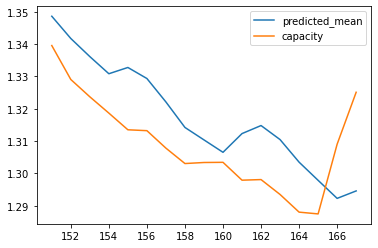

In [35]:
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 

#Prediction
start_index = len(X_train)
end_index = len(df)-1
prediction = result.predict(start_index, end_index)
#Rename the column

# plot predictions and actual values 
prediction.plot(legend = True) 
X_test['capacity'].plot(legend = True) 


In [38]:
import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(X_train["capacity"], train_prediction))
print('Train Score: %.5f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(X_test["capacity"], prediction))
print('Test Score: %.5f RMSE' % (testScore))


Train Score: 0.16951 RMSE
Test Score: 0.01514 RMSE


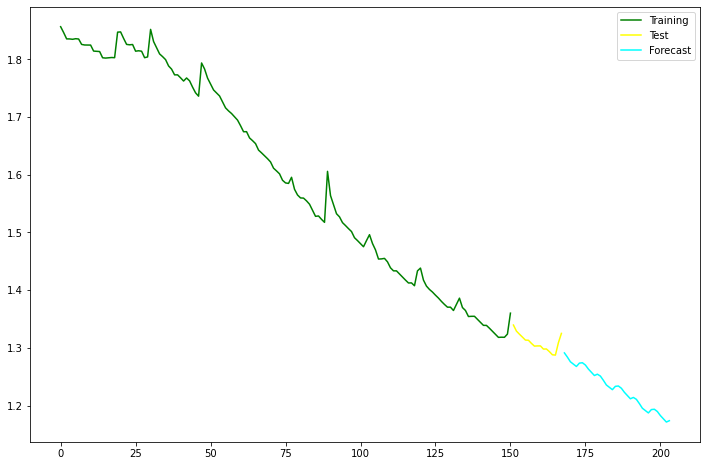

In [39]:
forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
plt.figure(figsize=(12,8))
plt.plot(X_train["capacity"], label='Training', color='green')
plt.plot(X_test["capacity"], label='Test', color='yellow')
plt.plot(forecast, label='Forecast', color='cyan')
plt.legend(loc='upper right')
plt.show()